# Model 5

### Target

- Add image augmentation with Random Rotation and Fill to improve the model performance.

### Results

- Parameters : 7,448
- Best Train Accuracy : 98.61
- Best Test Accuracy : 99.07

### Analysis

- Model with 7K parameters is able to reach till 99.07% accuracy in 15 epochs.
- Image augmentation doesn't seem to show much improvement. It may be because of presense of dropout which effectively does similar function.


# Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.


In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [3]:
from utils import load_mnist_data

In [4]:
train , test = load_mnist_data(train_transforms,test_transforms)

# Dataloader Arguments & Test/Train Dataloaders


In [5]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


# The Model

Adding Image Augmentation Methods and Techniques

In [6]:
from model import Model5 as Net

# Model Params
Can't emphasize on how important viewing Model Summary is.
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
       BatchNorm2d-2            [-1, 8, 26, 26]              16
              ReLU-3            [-1, 8, 26, 26]               0
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
       BatchNorm2d-6           [-1, 16, 24, 24]              32
              ReLU-7           [-1, 16, 24, 24]               0
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             128
      BatchNorm2d-10            [-1, 8, 24, 24]              16
             ReLU-11            [-1, 8, 24, 24]               0
          Dropout-12            [-1, 8, 24, 24]               0
        MaxPool2d-13            [-1, 8, 12, 12]               0
           Conv2d-14           [-1

# Training and Testing

All right, so we have 7,448 params. We introduce Image Augmentation methods like Random Rotation and Fill.

Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs.

Let's import train and test functions from our `model.py` script file

In [8]:
from model import train,test

# Let's Train and test our model

In [9]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15

train_losses = []
test_losses = []
train_acc = []
test_acc = []

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch , train_losses , train_acc)
    test(model, device, test_loader ,test_losses , test_acc)

EPOCH: 0


  0%|          | 0/469 [00:00<?, ?it/s]

Loss=0.11166316270828247 Batch_id=468 Accuracy=82.93: 100%|██████████| 469/469 [00:09<00:00, 47.73it/s]



Test set: Average loss: 0.1245, Accuracy: 9652/10000 (96.52%)

EPOCH: 1


Loss=0.08408528566360474 Batch_id=468 Accuracy=96.76: 100%|██████████| 469/469 [00:09<00:00, 52.04it/s] 



Test set: Average loss: 0.0819, Accuracy: 9764/10000 (97.64%)

EPOCH: 2


Loss=0.07830434292554855 Batch_id=468 Accuracy=97.41: 100%|██████████| 469/469 [00:09<00:00, 47.74it/s] 



Test set: Average loss: 0.0616, Accuracy: 9812/10000 (98.12%)

EPOCH: 3


Loss=0.0984814241528511 Batch_id=468 Accuracy=97.75: 100%|██████████| 469/469 [00:08<00:00, 54.01it/s]  



Test set: Average loss: 0.0550, Accuracy: 9828/10000 (98.28%)

EPOCH: 4


Loss=0.06965354830026627 Batch_id=468 Accuracy=97.95: 100%|██████████| 469/469 [00:08<00:00, 54.09it/s] 



Test set: Average loss: 0.0537, Accuracy: 9842/10000 (98.42%)

EPOCH: 5


Loss=0.07573606818914413 Batch_id=468 Accuracy=98.15: 100%|██████████| 469/469 [00:08<00:00, 52.95it/s] 



Test set: Average loss: 0.0435, Accuracy: 9867/10000 (98.67%)

EPOCH: 6


Loss=0.038581930100917816 Batch_id=468 Accuracy=98.26: 100%|██████████| 469/469 [00:08<00:00, 53.42it/s]



Test set: Average loss: 0.0402, Accuracy: 9876/10000 (98.76%)

EPOCH: 7


Loss=0.061100155115127563 Batch_id=468 Accuracy=98.21: 100%|██████████| 469/469 [00:08<00:00, 54.13it/s]



Test set: Average loss: 0.0384, Accuracy: 9892/10000 (98.92%)

EPOCH: 8


Loss=0.03243057802319527 Batch_id=468 Accuracy=98.41: 100%|██████████| 469/469 [00:08<00:00, 54.28it/s] 



Test set: Average loss: 0.0433, Accuracy: 9878/10000 (98.78%)

EPOCH: 9


Loss=0.06933587789535522 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:08<00:00, 53.25it/s]  



Test set: Average loss: 0.0413, Accuracy: 9866/10000 (98.66%)

EPOCH: 10


Loss=0.0387873649597168 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:09<00:00, 51.24it/s]  



Test set: Average loss: 0.0318, Accuracy: 9901/10000 (99.01%)

EPOCH: 11


Loss=0.026363739743828773 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:08<00:00, 52.86it/s]



Test set: Average loss: 0.0397, Accuracy: 9880/10000 (98.80%)

EPOCH: 12


Loss=0.02194192260503769 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:08<00:00, 52.95it/s]  



Test set: Average loss: 0.0325, Accuracy: 9900/10000 (99.00%)

EPOCH: 13


Loss=0.008489863947033882 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:08<00:00, 53.12it/s] 



Test set: Average loss: 0.0396, Accuracy: 9885/10000 (98.85%)

EPOCH: 14


Loss=0.024697745218873024 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:08<00:00, 53.92it/s] 



Test set: Average loss: 0.0331, Accuracy: 9907/10000 (99.07%)



In [10]:
from model import plot_graphs

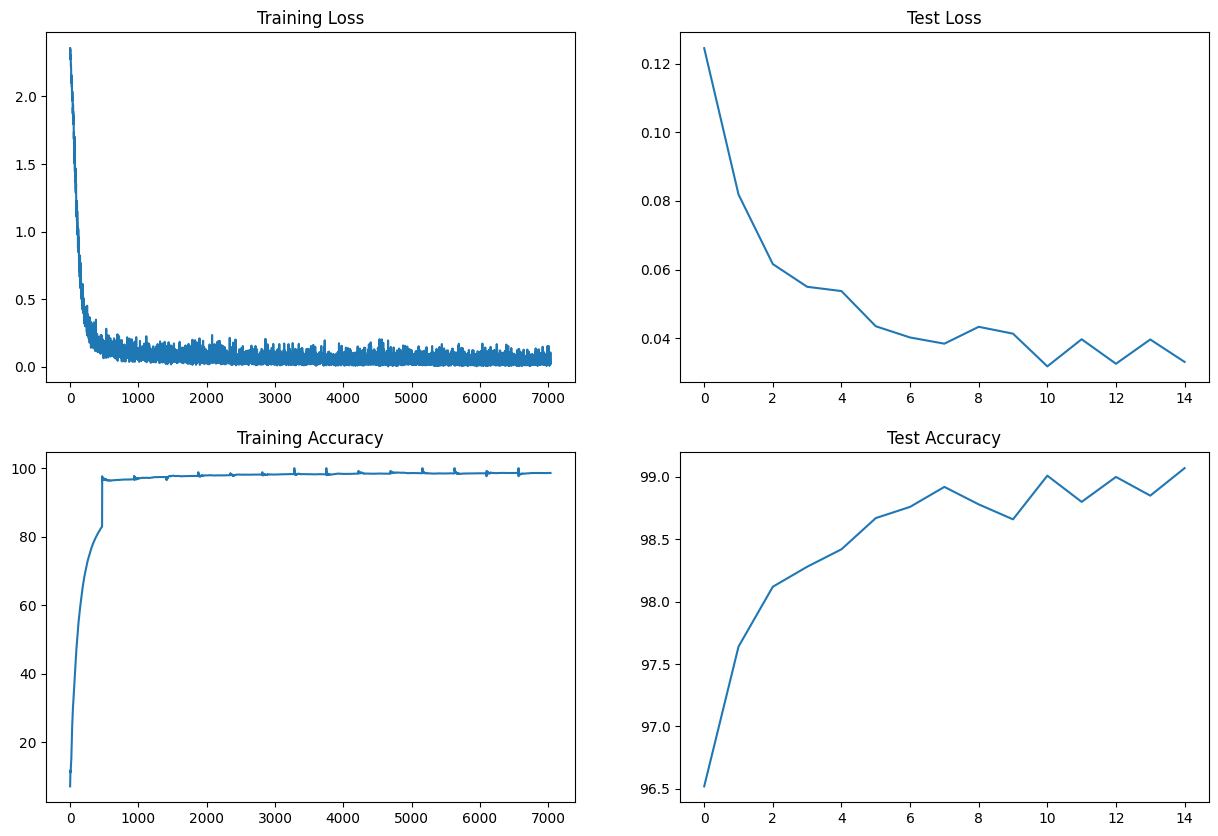

In [11]:
plot_graphs(train_losses , train_acc , test_losses , test_acc)